In [26]:
import pandas as pd # Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python
import json # JSON encoder and decoder for Python
import requests # Library for sending HTTP requests
from getpass import getpass # required only for hiding your variables
#https://ga-dev-tools.web.app/query-explorer/

In [34]:
api_query_uri = getpass('Enter API Query URI here') # get the URI
print(api_query_uri)
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df = pd.DataFrame(data['rows']) # turn data into a Pandas data frame
df = df.rename(columns={0: 'Date', 1: 'Users', 2: 'New Users', 3: 'New Sessions', 4:'Sessions', 5:'Sources'}) # giving the columns some proper titles

df['Sessions'] = df['Sessions'].astype(int) # formatting sessions as ints
df['Users'] = df['Users'].astype(int) # formatting users as ints
df['Date'] = pd.to_datetime(df['Date'])
df['New Sessions'] = df['New Sessions'].astype(float).round(2)
df['New Users'] = df['New Users'].astype(int)
#df.head() # printing the first five rows
df

Enter API Query URI here········
https://www.googleapis.com/analytics/v3/data/ga?access_token=ya29.a0ARrdaM8qEWYDoobPm-TW6fzgt-SMF3njVpTUkm1r2Qpft5vUmOoexyI4_k0F-gEQBHVYX_fQd1U0ggZlIGf5paNSaRWiO7H73Z-GQ50TBtF_LxzFWmdsXXJhFuESqJLiGDGA1jOfOssACwNjToy6HW_by3oQeA&ids=ga%3A248653243&dimensions=ga%3Adate&metrics=ga%3Ausers%2Cga%3AnewUsers%2Cga%3ApercentNewSessions%2Cga%3Asessions&segment=gaid%3A%3APp9EcXFgRKaAfjRBNupr2g&start-date=5daysAgo&end-date=today


In [ ]:
df.to_csv("users_menoplan.csv")

In [35]:
print(df["New Users"].sum())

16


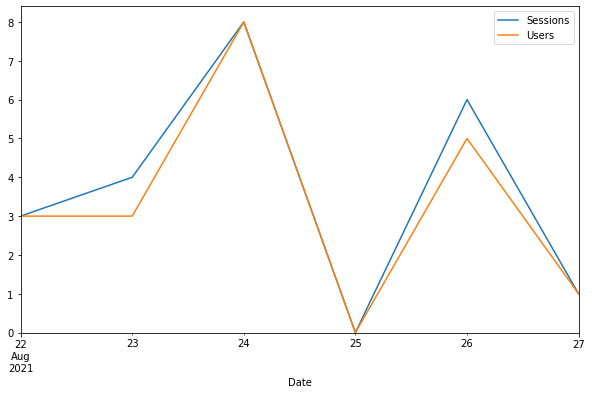

In [8]:
df.plot.line(x='Date', y=['Sessions', 'Users'], ylim=[0,None], figsize=[10, 6])

In [36]:
api_query_uri = getpass('Enter API Query URI here') # get the URI
r = requests.get(api_query_uri) # make the request
data= r.json() # read data from a JSON format
df = pd.DataFrame(data['rows']) # turn data into a Pandas data frame

df = df.rename(columns={0: 'Source', 1: 'City', 3: 'Users', 4:"Session Duration", 2: "PageDepth"}) # giving the columns some proper titles
df['Session Duration'] = pd.to_datetime(df['Session Duration'], unit='s').dt.time
df

Enter API Query URI here········


In [ ]:
df.to_csv("session_duration_page_depth.csv")
